In [1]:
from __future__ import annotations

import numpy as np
import matplotlib.pyplot as plt
import fy3e_mersi
import relative_calibration

In [2]:
revolution_1 = 'data/L0_data/Y3E_08902_230324071540_7860R_MERSI.DAT'
revolution_2 = 'data/L0_data/Y3E_08909_230324193335_7860R.MERSI.DAT'

In [3]:
with open(revolution_1, 'rb') as stream:
    revolution_1_mersi_data = fy3e_mersi.parse(stream, 200)

with open(revolution_2, 'rb') as stream:
    revolution_2_mersi_data = fy3e_mersi.parse(stream, 200)

In [4]:
d = 1

In [5]:
revolution_1_mersi_data.sv_dn = revolution_1_mersi_data.sv_dn[:len(revolution_1_mersi_data.sv_dn) // d]
revolution_1_mersi_data.voc_dn = revolution_1_mersi_data.voc_dn[:len(revolution_1_mersi_data.voc_dn) // d]

In [4]:
for i in range(revolution_1_mersi_data.b6.shape[0]):
    if (i + 1) % 2 == 0:
        revolution_1_mersi_data.b6[i] = np.concatenate([revolution_1_mersi_data.b6[i, 2:], np.zeros(2)])[:,]

In [5]:
for i in range(revolution_2_mersi_data.b6.shape[0]):
    if (i + 1) % 2 == 0:
        revolution_2_mersi_data.b6[i] = np.concatenate([revolution_2_mersi_data.b6[i, 2:], np.zeros(2)])[:,]

In [6]:
sv_telemetry_1 = fy3e_mersi.parse_telemetry_data(revolution_1_mersi_data.sv_dn,
                                                                     fy3e_mersi.SV_SCAN_SIZE,
                                                                     fy3e_mersi.SV_BLOCK_SIZE,
                                                                     fy3e_mersi.SV_DN_INLINE_COUNT)

voc_telemetry_1 = fy3e_mersi.parse_telemetry_data(revolution_1_mersi_data.voc_dn,
                                                                        fy3e_mersi.VOC_SCAN_SIZE,
                                                                        fy3e_mersi.VOC_BLOCK_SIZE,
                                                                        fy3e_mersi.VOC_DN_INLINE_COUNT)

In [7]:
sv_telemetry_2 = fy3e_mersi.parse_telemetry_data(revolution_2_mersi_data.sv_dn,
                                                                     fy3e_mersi.SV_SCAN_SIZE,
                                                                     fy3e_mersi.SV_BLOCK_SIZE,
                                                                     fy3e_mersi.SV_DN_INLINE_COUNT)

voc_telemetry_2 = fy3e_mersi.parse_telemetry_data(revolution_2_mersi_data.voc_dn,
                                                                        fy3e_mersi.VOC_SCAN_SIZE,
                                                                        fy3e_mersi.VOC_BLOCK_SIZE,
                                                                        fy3e_mersi.VOC_DN_INLINE_COUNT)

In [8]:
alpha, beta = relative_calibration.coeff_calulation_b6(sv_telemetry_1.b6, voc_telemetry_1.b6)

In [9]:
b6_image_corrected = relative_calibration.apply_coeff_for_image(revolution_1_mersi_data.b6, alpha, beta)

In [10]:
b6_image_corrected_2 = relative_calibration.apply_coeff_for_image(revolution_2_mersi_data.b6, alpha, beta)

In [9]:
plt.imsave('b6_revolution_1.png', revolution_1_mersi_data.b6)
plt.imsave('b6_revolution_1_corr.png', b6_image_corrected)

In [12]:
plt.imsave('b6_revolution_2.png', revolution_2_mersi_data.b6)
plt.imsave('b6_revolution_2_corr.png', b6_image_corrected_2)

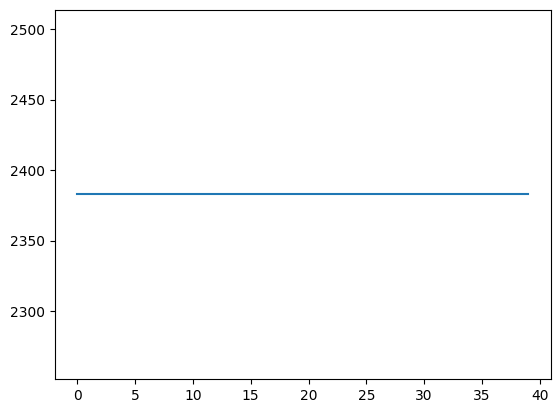

In [41]:
plt.plot(np.arange(40), alpha[0] * np.mean(voc_telemetry_1.b6[2:][::2], axis=(0, 2)) + beta[0])

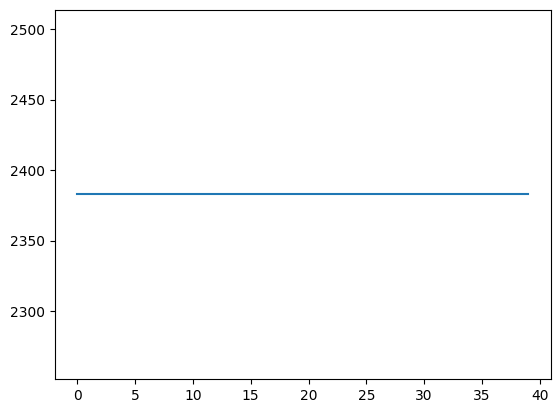

In [42]:
plt.plot(np.arange(40), alpha[1] * np.mean(voc_telemetry_1.b6[2:][1::2], axis=(0, 2)) + beta[1])

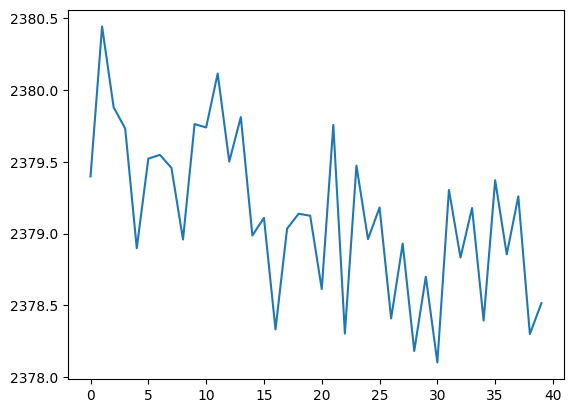

In [18]:
plt.plot(np.arange(40), alpha[1] * np.mean(voc_telemetry_2.b6[2:][0::2], axis=(0, 2)) + beta[1])